### Dependencies

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images, test_images = train_images/255, test_images/255

170500096/170498071 [==============================] - 81s 0us/step


### View Images

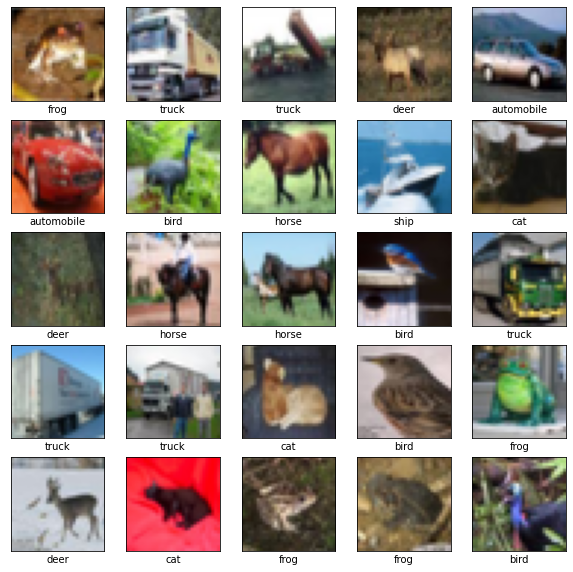

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Modelling

In [7]:
train_images.shape

(50000, 32, 32, 3)

In [47]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential

model = Sequential([
    Conv2D(32, (3,3), input_shape =(32,32,3), activation ='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    Conv2D(64, (3,3), activation = 'relu'),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 64)         

### Fit 

In [11]:
num_epochs = 5 
history = model.fit(train_images, train_labels, epochs = num_epochs, 
         validation_data = (test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 61s 1ms/step - loss: 1.2573 - accuracy: 0.5499 - val_loss: 1.0853 - val_accuracy: 0.6147
Epoch 2/5
50000/50000 [==============================] - 58s 1ms/step - loss: 1.0495 - accuracy: 0.6300 - val_loss: 1.1112 - val_accuracy: 0.6086
Epoch 3/5
50000/50000 [==============================] - 59s 1ms/step - loss: 0.9278 - accuracy: 0.6747 - val_loss: 0.9359 - val_accuracy: 0.6726
Epoch 4/5
50000/50000 [==============================] - 61s 1ms/step - loss: 0.8403 - accuracy: 0.7072 - val_loss: 0.8714 - val_accuracy: 0.6974
Epoch 5/5
50000/50000 [==============================] - 62s 1ms/step - loss: 0.7773 - accuracy: 0.7277 - val_loss: 0.8829 - val_accuracy: 0.6898


### Evaluate

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels,
                                    verbose =2)

In [17]:
history.history

{'val_loss': [1.0852645807266235,
  1.1112491807937621,
  0.935919440460205,
  0.8713721833229064,
  0.8829483599662781],
 'val_accuracy': [0.6147000193595886,
  0.6086000204086304,
  0.6725999712944031,
  0.6973999738693237,
  0.6898000240325928],
 'loss': [1.2573276689529418,
  1.0494697409057616,
  0.9278062511444092,
  0.8402785249710083,
  0.7773334997177124],
 'accuracy': [0.54994, 0.63004, 0.67472, 0.70722, 0.72774]}

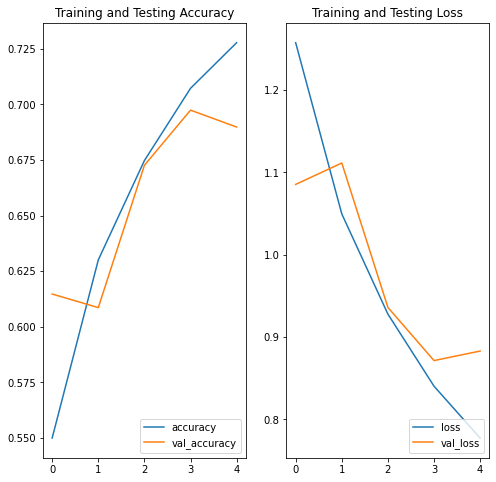

Accuracy:  0.6898000240325928


In [23]:
hist_acc = history.history['accuracy']
hist_val_acc = history.history['val_accuracy']
hist_loss = history.history['loss']
hist_val_loss = history.history['val_loss']

num_epochs=5
epochs_range = range(num_epochs)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(hist_acc, label = 'accuracy')
plt.plot(hist_val_acc, label ='val_accuracy')
#plt.xlab('Epochs')
#plt.ylab('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend(loc = 'lower right')

plt.subplot(1,2,2)
plt.plot(epochs_range, hist_loss, label = 'loss')
plt.plot(epochs_range, hist_val_loss, label = 'val_loss')
plt.legend(loc = 'lower right')
plt.title('Training and Testing Loss')
plt.show()

print('Accuracy: ', test_acc)

### Data Augmentation

In [44]:
from keras.preprocessing.image import ImageDataGenerator
import os

PATH = "E:/kaggle_original_data/dogs-vs-cats-small/"
train_dir = os.path.join(PATH, 'train') 

# create generator
image_generator_train = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    rotation_range = 45,
    width_shift_range=.15,
    height_shift_range=.15,
    zoom_range=0.5
)

# transform images
train_images_gen = image_generator_train.flow_from_directory(
    batch_size = 128,
    directory = train_dir,
    shuffle = True,
    target_size = (150, 150),
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


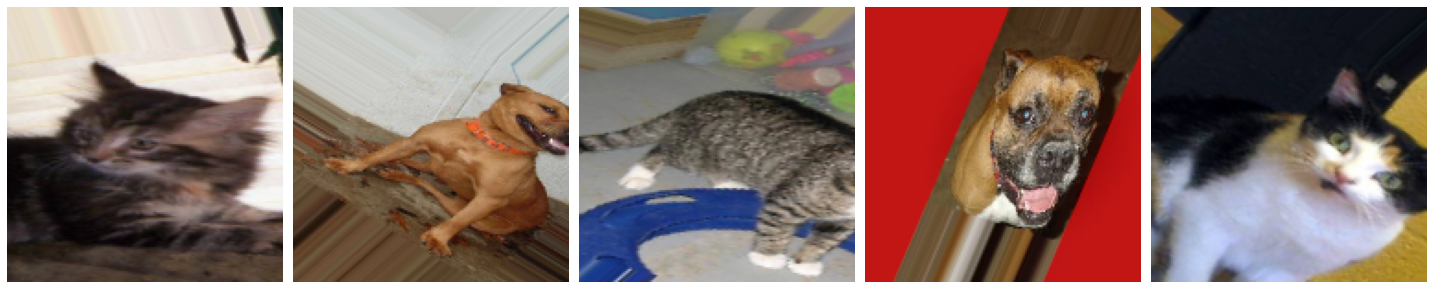

In [45]:
# view augmented images

def plotImages(images_arr):
    fig, axes = plt.subplots(1,5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_training_images, _ = next(train_images_gen)
plotImages(sample_training_images[:5])